## Ejercicio para resolver - Bisección
Obtener la raiz de la siguiente función:<br>
$$
f(x) = sen(x)-e^{(-x/2)}+1
$$
En el intervalo [-1, 4], con una tolerancia de 10^(-3)<br>
**Presentación:** Presentar las primeras 3 iteraciones en una hoja a mano y el desarrollo completo en Jupyter Notebook.

In [85]:
# Pasos La funcion debe ser continua en el intervalo
# Es un metodo de arranque, luego hay que usar uno de refinamiento.
# 1 - Tomar las cotas a y b y dividrlas por 2 para encontrar pto medio x0
# 2 - Definir la tolerancia. No aclara, el metodo de corte con error relativo o abosulto con modulo.
#     Podria utiizar el corte por error absouluto abs(x_n+1 - x_n / x_n) / x_n <= tolerancia
#     
# 3 - Verificar si f(x0) = 0 
# 4 - si f(a) * f(x0) > 0 entonces la raiz esta en [x0, b] si no en [a, x0]
# 5 - Veo el criterio de corte.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
class Biseccion():
    
    def __init__(self, function, *args):
        self.f = function
        self.df = pd.DataFrame(columns = ('a_i', 'b_i', 'x0', 'x1', 'p_i', 'condicion'))
        
    def f(self, x):
        return self.f(x)
    
    def p(self):
        return self.df.iloc[-1,:]['p_i']
    
    def biseccion(self, a, b, tolerancia, itmax = 100):
        i = 0
        a = a
        b = b
        x0, x1 = a, b
        
        if(self.f(a) * self.f(b) > 0):
            print('El metodo no resuelve esta raiz')
            return
        
        while (i < itmax) and (abs((x1-x0) / x1) >= tolerancia):
            x0 = x1
            x1 = (a + b) / 2
            if (self.f(x1) * self.f(a)) > 0:
                # Raiz entre [x0,b]
                self.df.loc[i] = [a, b, x1, x0, x1, '>0']
                a = x1
            else:
                self.df.loc[i] = [a, b, x1, x0, x1, '<0']
                b = x1
            i += 1
        
        error = abs((x1 - x0) / x1)
        print(error)
        print('El metodo de la biseccion convergió en ', i, ' iteraciones.')
        return self.df

7.007814391473222e-16
El metodo de la biseccion convergió en  51  iteraciones.


2.534822899364512

Text(0, 0.5, 'f(x)')

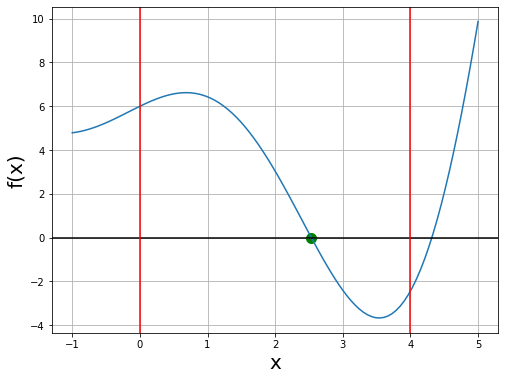

In [93]:
def f(x):
    return np.sin(x) - np.exp(-x / 2) + 1
def f(x):
    return (x+np.e**(x/2))*np.cos(x)+5

a = 0
b = 4
tolerancia = 10**(-15)

metodoBiseccion = Biseccion(f)
datos = metodoBiseccion.biseccion(a, b, tolerancia)
p = metodoBiseccion.p()

#display(datos)
display(p)

plt.figure(figsize = [6 * 4/3,6])
x = np.linspace(-1,5,100)
plt.plot(x,f(x))
plt.grid(True)
plt.axhline(0, color = 'black')
plt.axvline(a, color = 'red')
plt.axvline(b, color = 'red')
plt.scatter(p, 0, s = 100, color = 'green')
plt.xlabel('x', fontsize = 20)
plt.ylabel('f(x)', fontsize = 20)